Created on Tue Aug 13 08:15:27 2019
@author: AJ

# Plotting Basics Assignment  
## (Module 6, Section 4)

Let's go out into the world and generate some beautiful visuals. Pick a data source from [this aggregation](https://github.com/awesomedata/awesome-public-datasets), load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

Collect your images and descriptions into a shareable format. A Jupyter notebook is best, but anything you can link to is fine, including Google docs or markdown files on GitHub or gists, and share the link below.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

I chose a dataframe that outlined average monthly climate data in Washington, D.C. between 1980 and 2019. This dataset was generated [here](https://www.ncei.noaa.gov/orders/cdo/1836024.csv). To begin this assignment, we must upload that CSV into a Pandas dataframe, so that we can apply various visualizations.

In [62]:
data = pd.read_csv("https://www.ncei.noaa.gov/orders/cdo/1836024.csv")

In [11]:
data.head()    #check to see that data has been uploaded correctly

,STATION,NAME,DATE,DP01,DP10,DSNW,DT00,DT32,DX32,DX70,DX90,PRCP,SNOW,TAVG,TMAX,TMIN
0,US1DCDC0010,"WASHINGTON 5.0 N, DC US",2009-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,NaN,NaN,NaN,NaN
1,US1DCDC0011,"WASHINGTON 4.0 WNW, DC US",2009-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.49,NaN,NaN,NaN,NaN
2,USC00186350,"NATIONAL ARBORETUM DC, MD US",1980-01,8.0,6.0,0.0,0.0,25.0,4.0,0.0,0.0,3.35,0.5,34.2,42.0,26.3
3,USC00186350,"NATIONAL ARBORETUM DC, MD US",1980-02,7.0,3.0,1.0,0.0,24.0,7.0,0.0,0.0,0.87,2.0,31.1,39.9,22.4
4,USC00186350,"NATIONAL ARBORETUM DC, MD US",1980-04,12.0,11.0,0.0,0.0,1.0,0.0,5.0,0.0,3.84,0.0,53.8,62.8,44.8


Now that we have the dataframe, we would usually clean it up a bit, removing NaN entries and non-sensical values, but for the purposes of this assignment, we can skip that for now. I like to start all of my data visualization assignments with a set of histograms, which will show me how the data is spread for each variable.

In [12]:
data.columns

Index(['STATION', 'NAME', 'DATE', 'DP01', 'DP10', 'DSNW', 'DT00', 'DT32',
       'DX32', 'DX70', 'DX90', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [13]:
#Create array of strings with full variable names/ descriptions
headers = ["STATION", "NAME", "DATE", "NUMBER OF DAYS W/ >=0.1 INCH PRECIPITATION", "NUMBER OF DAYS W/ >=1.0 INCH PRECIPITATION", "NUMBER OF DAYS W/ >1.0 INCH SNOW DEPTH", "NUMBER DAYS W/ MIN TEMP <=0.0 F", "NUMBER DAYS W/ MIN TEMP <=32.0 F", "NUMBER DAYS W/ MAX TEMP <32.0 F", "NUMBER DAYS W/ MAX TEMP >70.0 F", "NUMBER DAYS W/ MAX TEMP >90.0 F", "AMOUNT OF PRECIPITATION", "AMOUNT OF SNOW", "AVERAGE TEMP", "MAX TEMP", "MIN TEMP"]

In [14]:
len(headers)==len(data.columns)

True

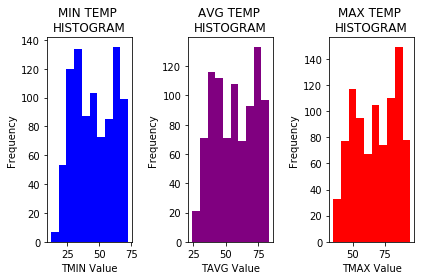

In [27]:
#Some Histograms:

plt.subplot(1,3,1)
plt.hist(data["TMIN"], color = 'blue')
plt.ylabel("Frequency")
plt.xlabel("TMIN Value")
plt.title("MIN TEMP \nHISTOGRAM")

plt.subplot(1,3,2)
plt.hist(data["TAVG"], color = 'purple')
plt.ylabel("Frequency")
plt.xlabel("TAVG Value")
plt.title("AVG TEMP \nHISTOGRAM")

plt.subplot(1,3,3)
plt.hist(data["TMAX"], color = 'red')
plt.ylabel("Frequency")
plt.xlabel("TMAX Value")
plt.title("MAX TEMP \nHISTOGRAM")

plt.tight_layout()
plt.show()

The above visualization shows histograms for the three temperature measurements (minimum, average, and maximum) as subplots on one figure. Histograms show how the data is spread, and often show a more normal, bell-shaped curve, with the highest-frequency values toward the middle of the x-axis. With these plots, we see that there seems to be two high-frequency regions, one on each end of the temperature spectrum, which is somewhat unexpected. This warrants further research, but an initial assumption as to the reason for this is that Washington D.C., the area being studied, has a climate that favors more extreme temperatures instead of moderate ones.

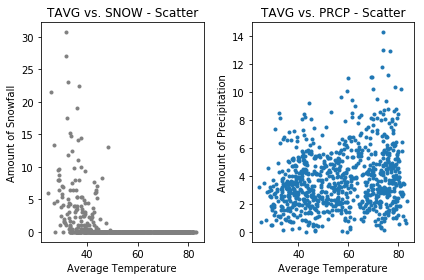

In [38]:
#Scatter Plots:

plt.subplot(1,2,1)
plt.scatter(data["TAVG"],data["SNOW"], marker = '.', color="gray")
plt.ylabel("Amount of Snowfall")
plt.xlabel("Average Temperature")
plt.title("TAVG vs. SNOW - Scatter")

plt.subplot(1,2,2)
plt.scatter(data["TAVG"],data["PRCP"], marker = '.')
plt.ylabel("Amount of Precipitation")
plt.xlabel("Average Temperature")
plt.title("TAVG vs. PRCP - Scatter")

plt.tight_layout()
plt.show()

The subplots in the above figure compare the average temperature to the amounts of snowfall and precipitation, respectively. The scatter plot on the left illustrates an exponentially decaying relationship between snowfall and temperature (snowfall reduces as temperature goes up), which makes sense, because snow requires low temperatures. The plot on the right shows more of a linear relationship between precipitation and temperature, which can also be expected, since rainfall does not require any particular temperature to occur. Interestingly, that plot also seems to show that there was more rain when the temperature was higher, which matches up with D.C.'s highly humid climate.

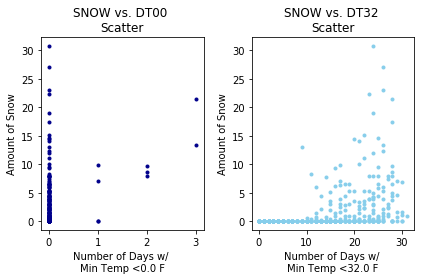

In [50]:
plt.subplot(1,2,1)
plt.scatter(data["DT00"], data["SNOW"], marker = '.', color="darkblue")
plt.ylabel("Amount of Snow")
plt.xlabel("Number of Days w/ \nMin Temp <0.0 F")
plt.title("SNOW vs. DT00 \nScatter")

plt.subplot(1,2,2)
plt.scatter(data["DT32"], data["SNOW"],marker = '.', color="skyblue")
plt.ylabel("Amount of Snow")
plt.xlabel("Number of Days w/ \nMin Temp <32.0 F")
plt.title("SNOW vs. DT32 \nScatter")

plt.tight_layout()
plt.show()

The first plot compares the amount of snow fallen during the month with the number of days in the month in which the minimum temperature was below 0 F. Although the data points that fall in the region where the x-value was greater than zero seem to show a linearly increasing trend, we can't draw a conclusion yet because there were just too few data points to work with. The second plot, however, shows a similar comparison, this time including days on which the minimum temperature was between 0 and 32 F. This plot shows a much clearer, exponentially increasing relationship, as one might expect (i.e. more snow falls when temperatures are below freezing).

In [86]:
#convert month-day date strings to year ints
dates = list(data["DATE"])

for i in range(len(dates)):
    dates[i] = int(dates[i].split("-")[0])
    
data["DATE"] = dates

In [111]:
#average monthly TAVG to get one value for each year
yravgs = []
for i in list(range(1980,2019)):
    yravgs.append(np.mean(data["TAVG"][np.where(data["DATE"]==i)[0]]))


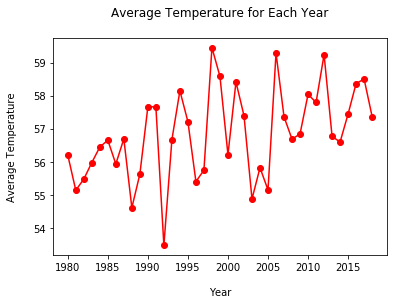

In [124]:
#Compare year to avg temp

plt.plot(list(range(1980,2019)),yravgs, '-or',)
plt.xticks(list(range(1980,2019,5)))

plt.xlabel("\nYear")
plt.ylabel("Average Temperature\n")
plt.title("Average Temperature for Each Year\n")
plt.show()



This final plot illustrates how, while the average temperatures each year do tend to fluctuate, a trend seems to be emerging. Over the almost 40 year time period studied with this dataset, average temperatures steadily climbed. However, this is not a definitive conclusion, as this is a relatively short time period in the grand scheme of things. Rather, it's more something interesting to notice that merits further investigation in the future.